Dataset Shape: (1000, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB
None

First 5 rows:
   id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female 

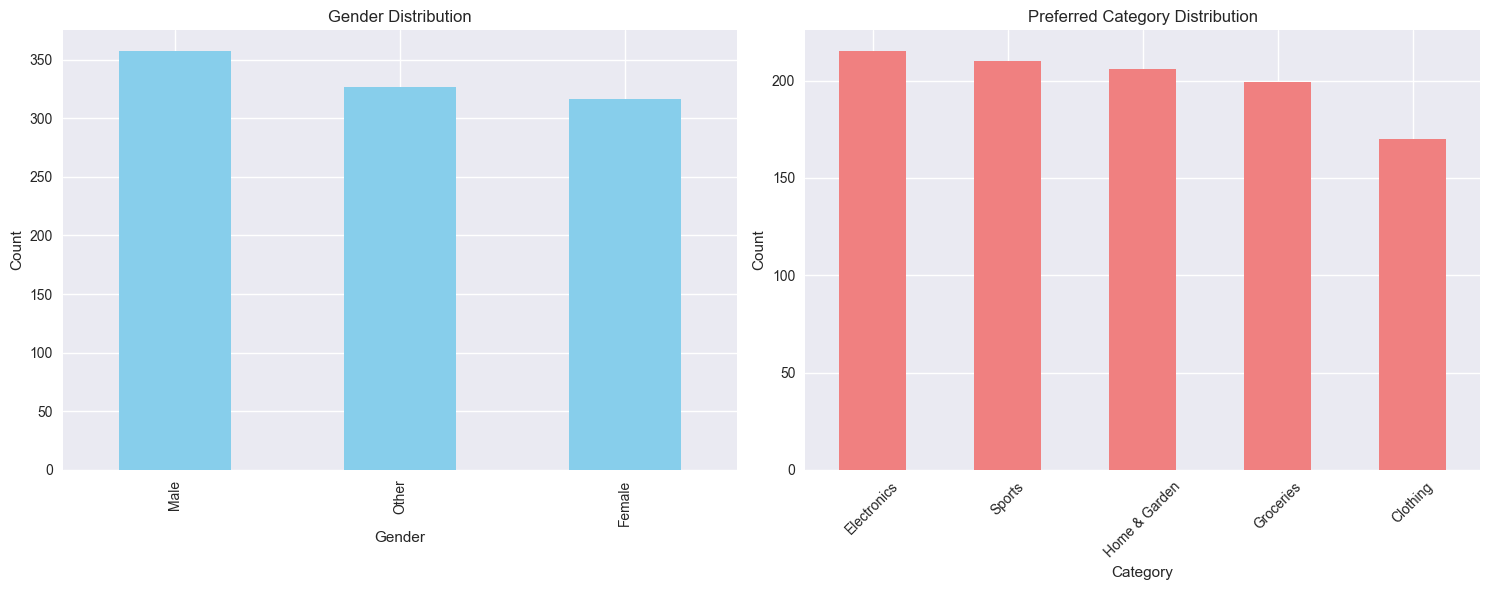

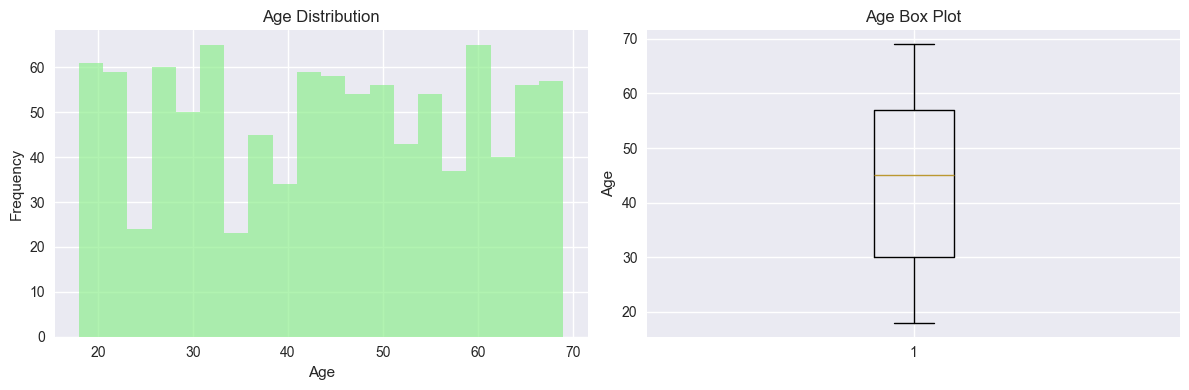

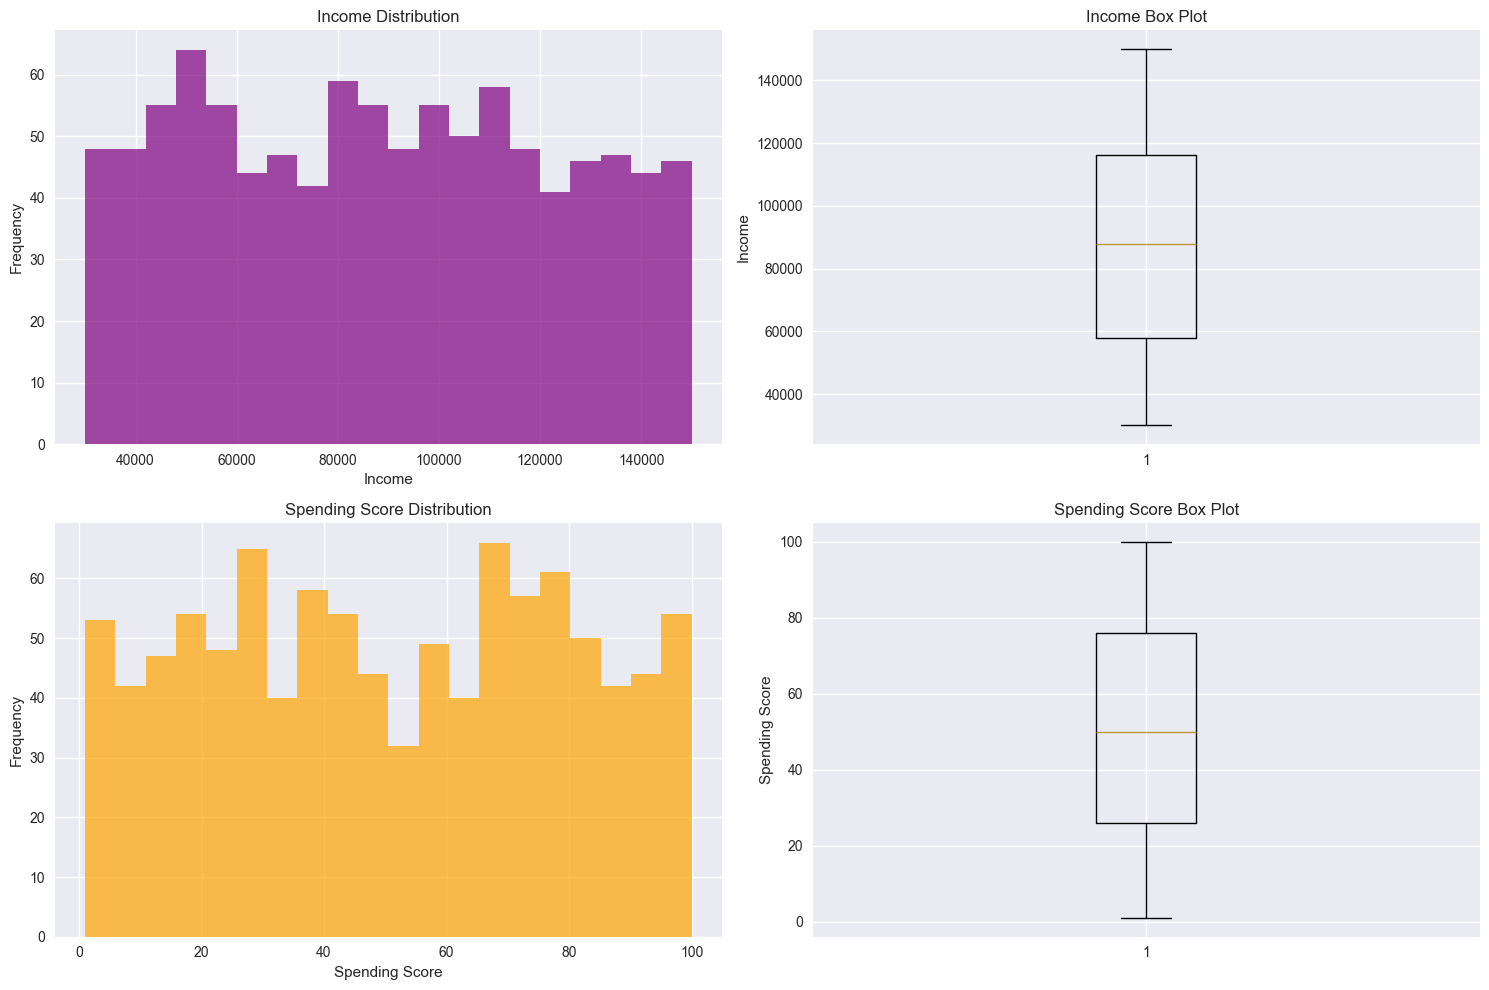

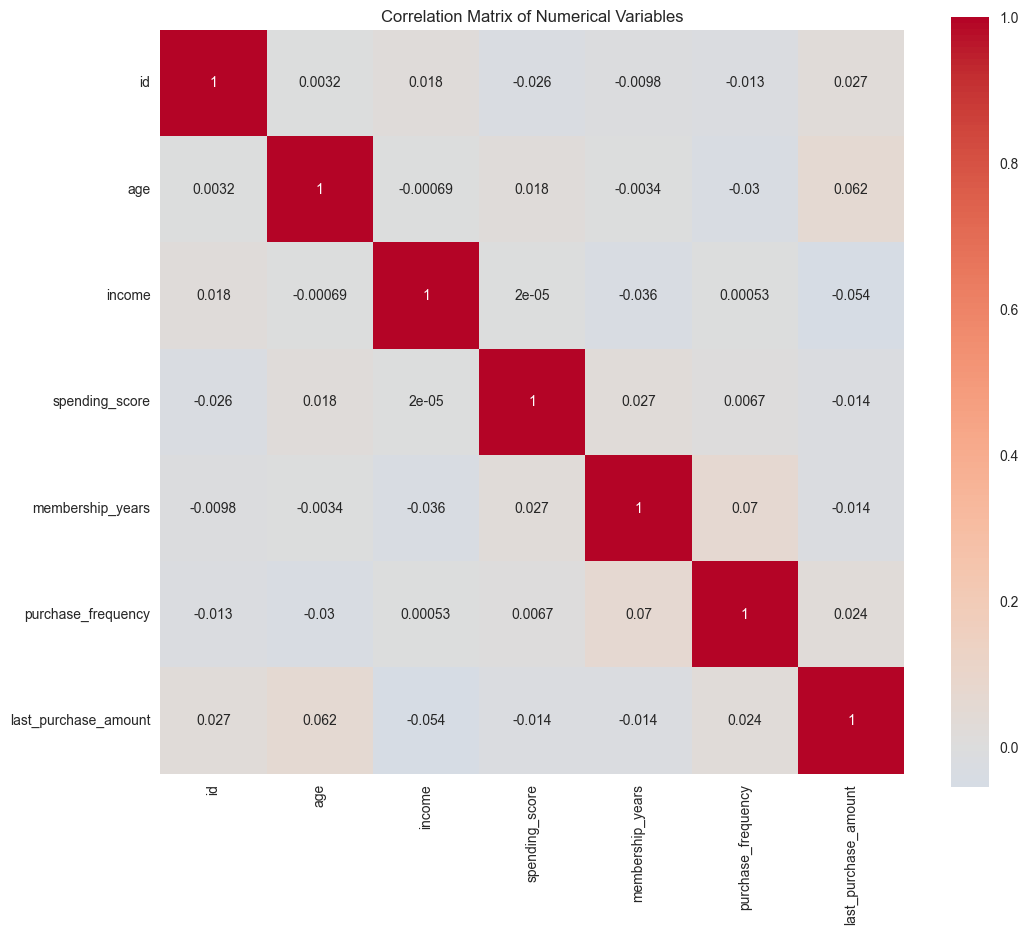

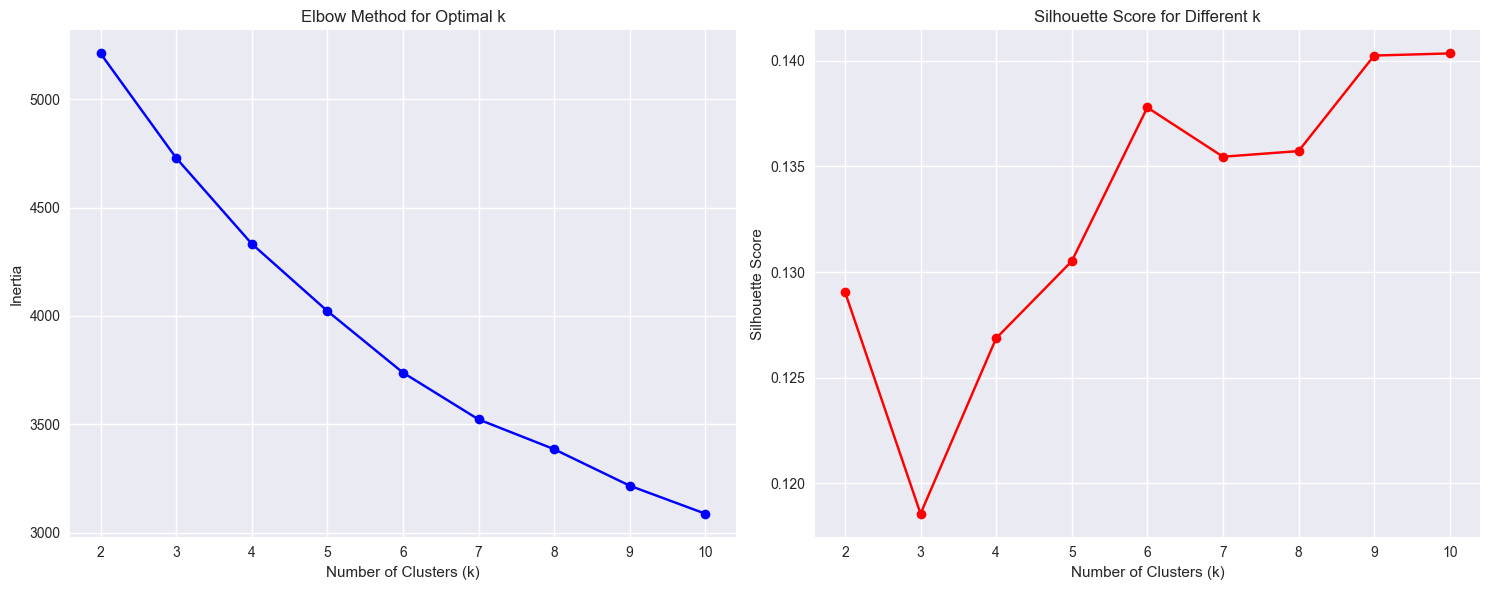

Silhouette Score for k=4: 0.127


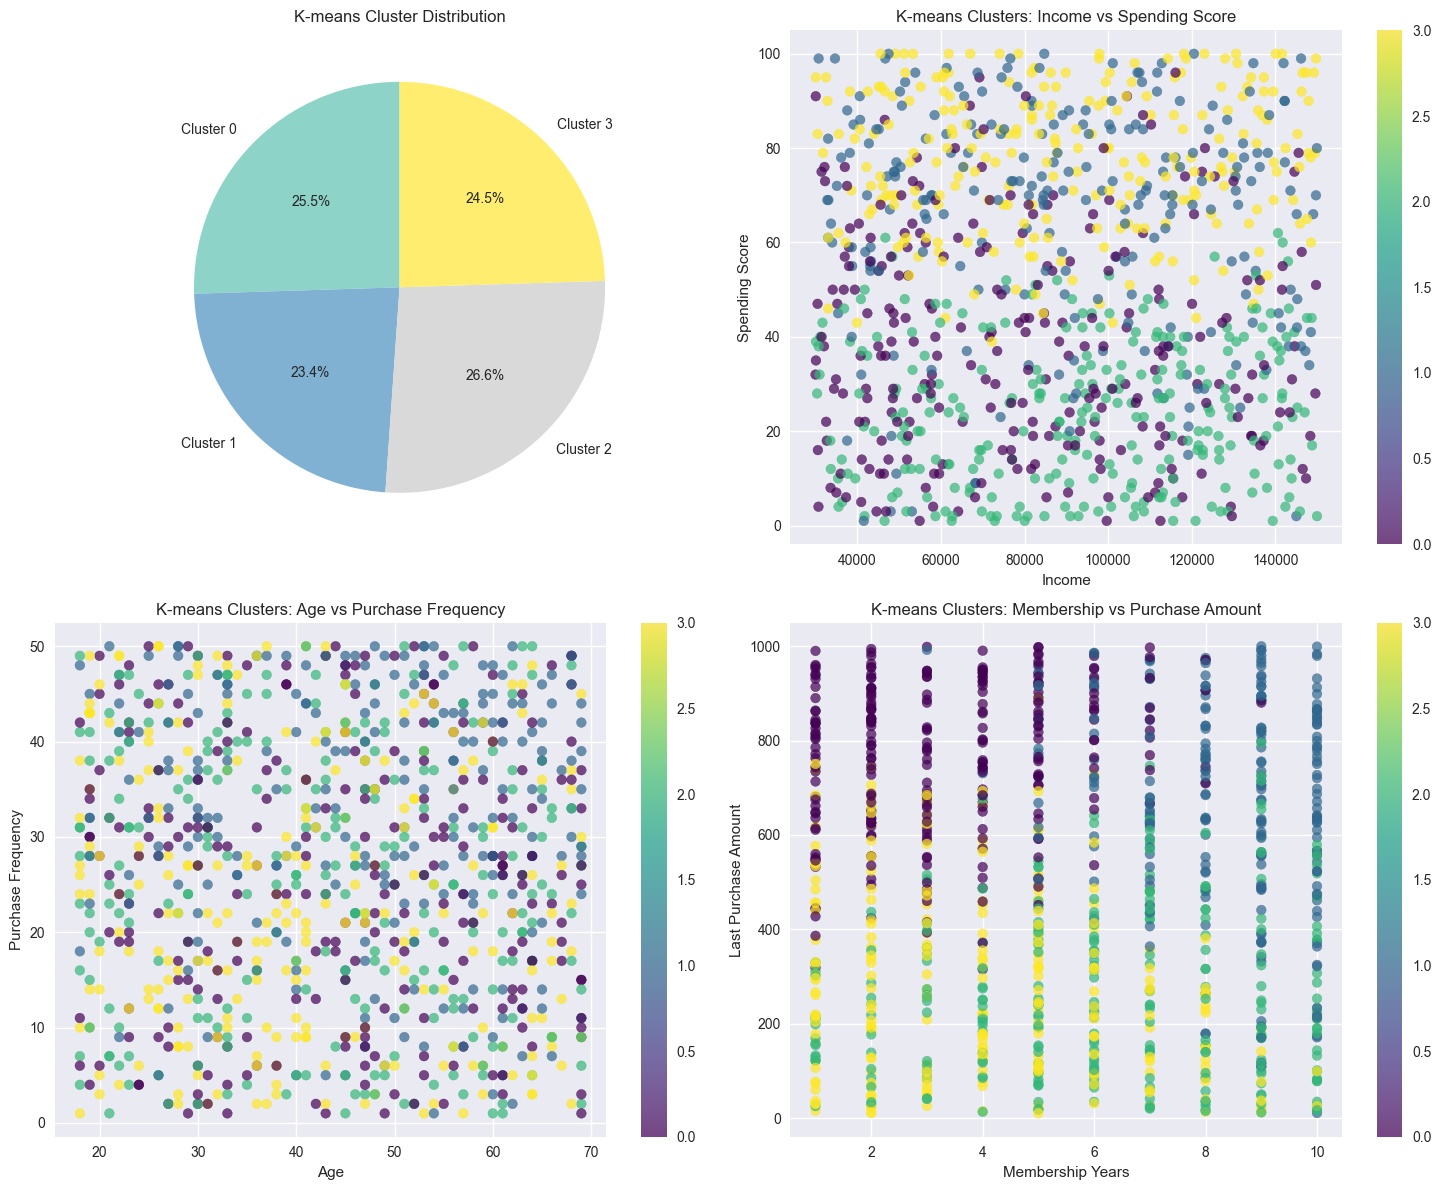


K-means Cluster Characteristics:
                      age        income  spending_score  membership_years  \
kmeans_cluster                                                              
0               44.435294  80122.788235       38.525490          3.396078   
1               47.235043  89898.914530       65.995726          8.333333   
2               42.992481  93596.560150       24.142857          6.191729   
3               40.665306  90352.889796       77.534694          4.106122   

                purchase_frequency  last_purchase_amount  
kmeans_cluster                                            
0                        25.509804            764.642431  
1                        32.115385            672.980043  
2                        25.526316            263.568534  
3                        23.616327            284.809347  


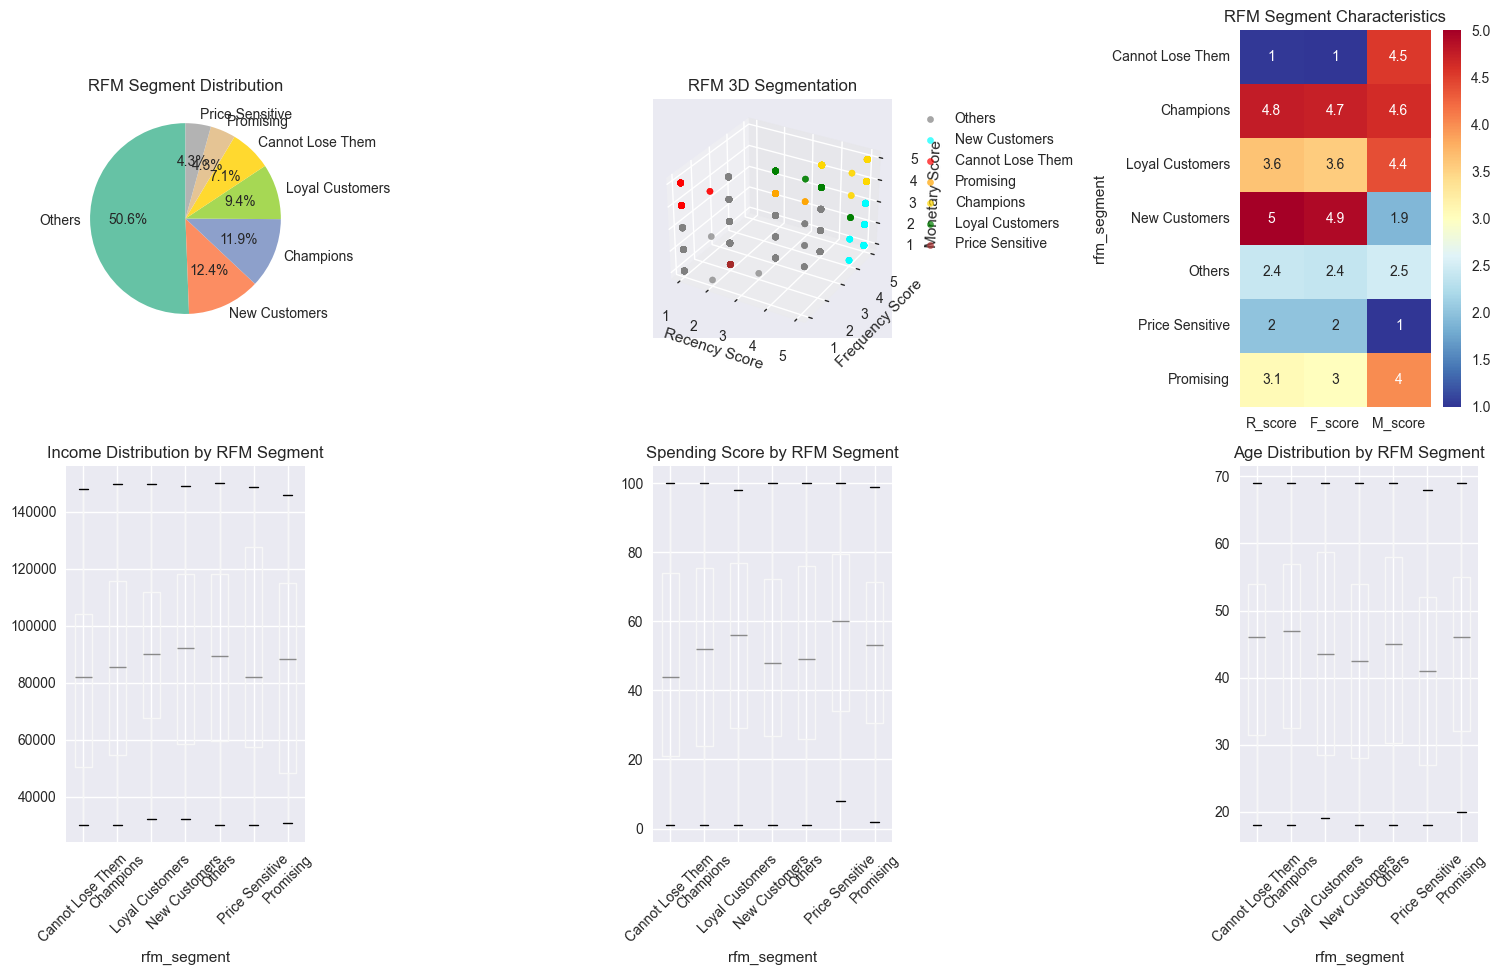


RFM Segment Summary:

📊 INTERACTIVE DASHBOARD SAVED AS: LG_Customer_Segmentation_Dashboard.html
Please open this file in your web browser to view the visualizations
BUSINESS INSIGHTS & STRATEGIC RECOMMENDATIONS

📊 KEY METRICS:
Total Customers: 1,000
Average Spending Score: 50.7
Average Income: $88,500.80
Average Customer Lifetime Value: $73547.96

🎯 SEGMENT ANALYSIS:

Others:
  • Size: 506 customers (50.6%)
  • Avg CLV: $42001.11
  • Avg Spending Score: 50.5

New Customers:
  • Size: 124 customers (12.4%)
  • Avg CLV: $66211.08
  • Avg Spending Score: 49.7

Cannot Lose Them:
  • Size: 71 customers (7.1%)
  • Avg CLV: $26991.86
  • Avg Spending Score: 48.3

Promising:
  • Size: 43 customers (4.3%)
  • Avg CLV: $110917.30
  • Avg Spending Score: 51.5

Champions:
  • Size: 119 customers (11.9%)
  • Avg CLV: $209316.79
  • Avg Spending Score: 49.6

Loyal Customers:
  • Size: 94 customers (9.4%)
  • Avg CLV: $128511.36
  • Avg Spending Score: 53.2

Price Sensitive:
  • Size: 43 customers (

In [ ]:
# Customer Segmentation Analysis for LG Corporation
# Business Analytics Capstone Final Project
# Ousman Kassama

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings

# Install required packages if missing
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
except ImportError:
    import sys
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "plotly"])
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots

# Install nbformat if needed
try:
    import nbformat
    if tuple(map(int, nbformat.__version__.split('.'))) < (4, 2, 0):
        raise ImportError
except (ImportError, AttributeError):
    import sys
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "nbformat>=4.2.0"])
    import nbformat

warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")



# 1. DATA LOADING AND EXPLORATION


# Load the dataset
df = pd.read_csv('Customer_Segmentation_Data.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Description:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


# 2. EXPLORATORY DATA ANALYSIS


# Check for unique values in categorical columns
print("\nUnique values in categorical columns:")
print("Gender:", df['gender'].unique())
print("Preferred Category:", df['preferred_category'].unique())

# Distribution of categorical variables
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gender distribution
df['gender'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Preferred category distribution
df['preferred_category'].value_counts().plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Preferred Category Distribution')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Age distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['age'], bins=20, color='lightgreen', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['age'])
plt.title('Age Box Plot')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

# Income and Spending Score distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Income distribution
axes[0, 0].hist(df['income'], bins=20, color='purple', alpha=0.7)
axes[0, 0].set_title('Income Distribution')
axes[0, 0].set_xlabel('Income')
axes[0, 0].set_ylabel('Frequency')

# Income box plot
axes[0, 1].boxplot(df['income'])
axes[0, 1].set_title('Income Box Plot')
axes[0, 1].set_ylabel('Income')

# Spending Score distribution
axes[1, 0].hist(df['spending_score'], bins=20, color='orange', alpha=0.7)
axes[1, 0].set_title('Spending Score Distribution')
axes[1, 0].set_xlabel('Spending Score')
axes[1, 0].set_ylabel('Frequency')

# Spending Score box plot
axes[1, 1].boxplot(df['spending_score'])
axes[1, 1].set_title('Spending Score Box Plot')
axes[1, 1].set_ylabel('Spending Score')

plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


# 3. FEATURE ENGINEERING


# Create age groups
def categorize_age(age):
    if age < 25:
        return '18-24'
    elif age < 35:
        return '25-34'
    elif age < 45:
        return '35-44'
    elif age < 55:
        return '45-54'
    elif age < 65:
        return '55-64'
    else:
        return '65+'

df['age_group'] = df['age'].apply(categorize_age)

# Create income groups
def categorize_income(income):
    if income < 50000:
        return 'Low'
    elif income < 100000:
        return 'Medium'
    else:
        return 'High'

df['income_group'] = df['income'].apply(categorize_income)

# Create spending score groups
def categorize_spending(score):
    if score < 30:
        return 'Low Spenders'
    elif score < 70:
        return 'Medium Spenders'
    else:
        return 'High Spenders'

df['spending_group'] = df['spending_score'].apply(categorize_spending)

# Calculate customer value score
df['customer_value_score'] = (
    df['spending_score'] * 0.4 + 
    (df['income'] / 1000) * 0.3 + 
    df['membership_years'] * 10 * 0.2 + 
    (df['purchase_frequency'] / 10) * 0.1
)

# RFM Analysis
# Recency (simulate days since last purchase)
df['recency'] = 365 - (df['purchase_frequency'] * 7)  # Higher frequency = more recent
df['frequency'] = df['purchase_frequency']
df['monetary'] = df['last_purchase_amount']

# RFM Scoring (1-5 scale)
df['R_score'] = pd.qcut(df['recency'], 5, labels=[5,4,3,2,1])  # Reverse for recency
df['F_score'] = pd.qcut(df['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
df['M_score'] = pd.qcut(df['monetary'], 5, labels=[1,2,3,4,5])

# Convert to numeric
df['R_score'] = df['R_score'].astype(int)
df['F_score'] = df['F_score'].astype(int)
df['M_score'] = df['M_score'].astype(int)

# Combined RFM Score
df['RFM_score'] = df['R_score'].astype(str) + df['F_score'].astype(str) + df['M_score'].astype(str)


# 4. CUSTOMER SEGMENTATION MODELS


# Prepare data for clustering
features_for_clustering = ['age', 'income', 'spending_score', 'membership_years', 
                          'purchase_frequency', 'last_purchase_amount']

X = df[features_for_clustering].copy()

# Handle any missing values
X = X.fillna(X.mean())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 4.1 K-MEANS CLUSTERING


# Determine optimal number of clusters using Elbow method
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow curve and Silhouette scores
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method for Optimal k')
axes[0].grid(True)

axes[1].plot(K_range, silhouette_scores, 'ro-')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score for Different k')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Apply K-means with optimal number of clusters (let's use k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

print(f"Silhouette Score for k={optimal_k}: {silhouette_score(X_scaled, df['kmeans_cluster']):.3f}")

# Visualize K-means clusters
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Cluster distribution pie chart
cluster_counts = df['kmeans_cluster'].value_counts().sort_index()
colors = plt.cm.Set3(np.linspace(0, 1, len(cluster_counts)))

axes[0, 0].pie(cluster_counts.values, labels=[f'Cluster {i}' for i in cluster_counts.index], 
               autopct='%1.1f%%', colors=colors, startangle=90)
axes[0, 0].set_title('K-means Cluster Distribution')

# Income vs Spending Score colored by cluster
scatter = axes[0, 1].scatter(df['income'], df['spending_score'], c=df['kmeans_cluster'], 
                            cmap='viridis', alpha=0.7)
axes[0, 1].set_xlabel('Income')
axes[0, 1].set_ylabel('Spending Score')
axes[0, 1].set_title('K-means Clusters: Income vs Spending Score')
plt.colorbar(scatter, ax=axes[0, 1])

# Age vs Purchase Frequency colored by cluster
scatter2 = axes[1, 0].scatter(df['age'], df['purchase_frequency'], c=df['kmeans_cluster'], 
                             cmap='viridis', alpha=0.7)
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Purchase Frequency')
axes[1, 0].set_title('K-means Clusters: Age vs Purchase Frequency')
plt.colorbar(scatter2, ax=axes[1, 0])

# Membership Years vs Last Purchase Amount colored by cluster
scatter3 = axes[1, 1].scatter(df['membership_years'], df['last_purchase_amount'], c=df['kmeans_cluster'], 
                             cmap='viridis', alpha=0.7)
axes[1, 1].set_xlabel('Membership Years')
axes[1, 1].set_ylabel('Last Purchase Amount')
axes[1, 1].set_title('K-means Clusters: Membership vs Purchase Amount')
plt.colorbar(scatter3, ax=axes[1, 1])

plt.tight_layout()
plt.show()

# Print cluster characteristics
print("\nK-means Cluster Characteristics:")
cluster_summary = df.groupby('kmeans_cluster')[features_for_clustering].mean()
print(cluster_summary)


# 4.2 RFM SEGMENTATION


def rfm_segment(row):
    if row['RFM_score'] in ['555', '554', '544', '545', '454', '455', '445']:
        return 'Champions'
    elif row['RFM_score'] in ['543', '444', '435', '355', '354', '345', '344', '335']:
        return 'Loyal Customers'
    elif row['RFM_score'] in ['512', '511', '422', '421', '412', '411', '311']:
        return 'Potential Loyalists'
    elif row['RFM_score'] in ['553', '551', '552', '541', '542', '533', '532', '531', '452', '451']:
        return 'New Customers'
    elif row['RFM_score'] in ['534', '343', '334', '343', '434', '343']:
        return 'Promising'
    elif row['RFM_score'] in ['155', '154', '144', '214', '215', '115', '114']:
        return 'Cannot Lose Them'
    elif row['RFM_score'] in ['155', '254', '245']:
        return 'At Risk'
    elif row['RFM_score'] in ['131', '141', '221']:
        return 'Price Sensitive'
    else:
        return 'Others'

df['rfm_segment'] = df.apply(rfm_segment, axis=1)

# Visualize RFM segments with pie chart
plt.figure(figsize=(15, 10))

# RFM Segment Distribution Pie Chart
plt.subplot(2, 3, 1)
rfm_counts = df['rfm_segment'].value_counts()
colors_rfm = plt.cm.Set2(np.linspace(0, 1, len(rfm_counts)))
plt.pie(rfm_counts.values, labels=rfm_counts.index, autopct='%1.1f%%', 
         colors=colors_rfm, startangle=90)
plt.title('RFM Segment Distribution')

# RFM 3D scatter plot
ax = plt.subplot(2, 3, 2, projection='3d')
segment_colors = {'Champions': 'gold', 'Loyal Customers': 'green', 
                  'Potential Loyalists': 'blue', 'New Customers': 'cyan',
                  'Promising': 'orange', 'Cannot Lose Them': 'red',
                  'At Risk': 'purple', 'Price Sensitive': 'brown', 'Others': 'gray'}

for segment in df['rfm_segment'].unique():
    segment_data = df[df['rfm_segment'] == segment]
    ax.scatter(segment_data['R_score'], segment_data['F_score'], segment_data['M_score'],
               c=segment_colors.get(segment, 'gray'), label=segment, alpha=0.7)

ax.set_xlabel('Recency Score')
ax.set_ylabel('Frequency Score')
ax.set_zlabel('Monetary Score')
ax.set_title('RFM 3D Segmentation')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# RFM segment characteristics heatmap
plt.subplot(2, 3, 3)
rfm_summary = df.groupby('rfm_segment')[['R_score', 'F_score', 'M_score']].mean()
sns.heatmap(rfm_summary, annot=True, cmap='RdYlBu_r', center=3)
plt.title('RFM Segment Characteristics')

# Income distribution by RFM segment
plt.subplot(2, 3, 4)
df.boxplot(column='income', by='rfm_segment', ax=plt.gca())
plt.title('Income Distribution by RFM Segment')
plt.xticks(rotation=45)
plt.suptitle('')

# Spending score distribution by RFM segment
plt.subplot(2, 3, 5)
df.boxplot(column='spending_score', by='rfm_segment', ax=plt.gca())
plt.title('Spending Score by RFM Segment')
plt.xticks(rotation=45)
plt.suptitle('')

# Age distribution by RFM segment
plt.subplot(2, 3, 6)
df.boxplot(column='age', by='rfm_segment', ax=plt.gca())
plt.title('Age Distribution by RFM Segment')
plt.xticks(rotation=45)
plt.suptitle('')

plt.tight_layout()
plt.show()

print("\nRFM Segment Summary:")
rfm_segment_summary = df.groupby('rfm_segment').agg({
    'age': 'mean',
    'income': 'mean',
    'spending_score': 'mean',
    'purchase_frequency': 'mean',
    'membership_years': 'mean',
    'last_purchase_amount': 'mean'
}).round(2)


# 5. ADDITIONAL ANALYSIS & VISUALIZATIONS


# Customer lifetime value analysis
df['estimated_clv'] = (df['last_purchase_amount'] * df['purchase_frequency'] * df['membership_years'])

# Create comprehensive dashboard visualizations
fig = make_subplots(
    rows=3, cols=3,
    subplot_titles=(
        'Age Groups Distribution', 
        'Income vs Spending by Gender', 
        'Category Preferences',
        'Customer Value Score Distribution', 
        'Purchase Frequency by Spending Group', 
        'CLV by RFM Segment',
        'Membership Years Impact', 
        'Spending Pattern by Age Group', 
        'Feature Correlation'
    ),
    specs=[
        [{"type": "bar"}, {"type": "scatter"}, {"type": "bar"}],
        [{"type": "histogram"}, {"type": "box"}, {"type": "bar"}],
        [{"type": "scatter"}, {"type": "bar"}, {"type": "heatmap"}]
    ]
)

# Age Groups Distribution
age_group_counts = df['age_group'].value_counts().sort_index()
fig.add_trace(go.Bar(
    x=age_group_counts.index, 
    y=age_group_counts.values, 
    name="Age Groups",
    marker_color=px.colors.qualitative.Pastel
), row=1, col=1)

# Income vs Spending by Gender
color_map = {'Male': 'blue', 'Female': 'pink'}
for gender in df['gender'].unique():
    gender_data = df[df['gender'] == gender]
    fig.add_trace(go.Scatter(
        x=gender_data['income'], 
        y=gender_data['spending_score'],
        mode='markers', 
        name=gender,
        marker=dict(color=color_map.get(gender, 'gray')),
        opacity=0.7
    ), row=1, col=2)

# Category Preferences
category_counts = df['preferred_category'].value_counts()
fig.add_trace(go.Bar(
    x=category_counts.index, 
    y=category_counts.values, 
    name="Categories",
    marker_color=px.colors.qualitative.Set3
), row=1, col=3)

# Customer Value Score Distribution
fig.add_trace(go.Histogram(
    x=df['customer_value_score'], 
    name="CVS Distribution",
    marker_color='skyblue',
    nbinsx=30
), row=2, col=1)

# Purchase Frequency by Spending Group
for i, group in enumerate(df['spending_group'].unique()):
    group_data = df[df['spending_group'] == group]
    fig.add_trace(go.Box(
        y=group_data['purchase_frequency'], 
        name=group,
        marker_color=px.colors.qualitative.Pastel[i]
    ), row=2, col=2)

# CLV by RFM Segment
clv_by_segment = df.groupby('rfm_segment')['estimated_clv'].mean().sort_values(ascending=False)
fig.add_trace(go.Bar(
    x=clv_by_segment.index, 
    y=clv_by_segment.values, 
    name="CLV by Segment",
    marker_color=px.colors.sequential.Viridis
), row=2, col=3)

# Membership Years vs Spending Score
fig.add_trace(go.Scatter(
    x=df['membership_years'], 
    y=df['spending_score'],
    mode='markers', 
    name="Membership Impact",
    marker=dict(
        color=df['age'],
        colorscale='Rainbow',
        showscale=True,
        size=8,
        opacity=0.7
    )
), row=3, col=1)

# Spending Pattern by Age Group (NEW)
age_spending = df.groupby('age_group')['spending_score'].mean().reset_index()
fig.add_trace(go.Bar(
    x=age_spending['age_group'], 
    y=age_spending['spending_score'], 
    name="Avg Spending by Age",
    marker_color=px.colors.sequential.Plasma
), row=3, col=2)

# Feature Correlation (NEW)
corr_matrix = df[features_for_clustering].corr()
fig.add_trace(go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='RdBu',
    zmin=-1,
    zmax=1,
    name="Correlation"
), row=3, col=3)

# Update layout
fig.update_layout(
    height=1200, 
    width=1400,
    showlegend=True,
    title_text="LG Customer Analytics Dashboard",
    title_font_size=24
)

# Add axis titles
fig.update_xaxes(title_text="Age Group", row=1, col=1)
fig.update_xaxes(title_text="Income", row=1, col=2)
fig.update_xaxes(title_text="Category", row=1, col=3)
fig.update_xaxes(title_text="Customer Value Score", row=2, col=1)
fig.update_xaxes(title_text="Spending Group", row=2, col=2)
fig.update_xaxes(title_text="RFM Segment", row=2, col=3)
fig.update_xaxes(title_text="Membership Years", row=3, col=1)
fig.update_xaxes(title_text="Age Group", row=3, col=2)
fig.update_xaxes(title_text="Features", row=3, col=3)

fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Spending Score", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=3)
fig.update_yaxes(title_text="Frequency", row=2, col=1)
fig.update_yaxes(title_text="Purchase Frequency", row=2, col=2)
fig.update_yaxes(title_text="Average CLV", row=2, col=3)
fig.update_yaxes(title_text="Spending Score", row=3, col=1)
fig.update_yaxes(title_text="Avg Spending Score", row=3, col=2)

# Save dashboard as HTML instead of showing
dashboard_file = "LG_Customer_Segmentation_Dashboard.html"
fig.write_html(dashboard_file)

print(f"\n📊 INTERACTIVE DASHBOARD SAVED AS: {dashboard_file}")
print("Please open this file in your web browser to view the visualizations")


# 6. BUSINESS INSIGHTS & RECOMMENDATIONS


print("="*60)
print("BUSINESS INSIGHTS & STRATEGIC RECOMMENDATIONS")
print("="*60)

# Key metrics calculation
total_customers = len(df)
avg_spending_score = df['spending_score'].mean()
avg_income = df['income'].mean()
avg_clv = df['estimated_clv'].mean()

print(f"\n📊 KEY METRICS:")
print(f"Total Customers: {total_customers:,}")
print(f"Average Spending Score: {avg_spending_score:.1f}")
print(f"Average Income: ${avg_income:,.2f}")
print(f"Average Customer Lifetime Value: ${avg_clv:.2f}")

# Segment analysis
print(f"\n🎯 SEGMENT ANALYSIS:")
for segment in df['rfm_segment'].unique():
    segment_data = df[df['rfm_segment'] == segment]
    segment_size = len(segment_data)
    segment_percentage = (segment_size / total_customers) * 100
    avg_segment_clv = segment_data['estimated_clv'].mean()
    
    print(f"\n{segment}:")
    print(f"  • Size: {segment_size} customers ({segment_percentage:.1f}%)")
    print(f"  • Avg CLV: ${avg_segment_clv:.2f}")
    print(f"  • Avg Spending Score: {segment_data['spending_score'].mean():.1f}")

# Category insights
print(f"\n🛍️ CATEGORY INSIGHTS:")
category_analysis = df.groupby('preferred_category').agg({
    'last_purchase_amount': 'mean',
    'purchase_frequency': 'mean',
    'spending_score': 'mean'
}).round(2)

for category in category_analysis.index:
    print(f"\n{category}:")
    print(f"  • Avg Purchase Amount: ${category_analysis.loc[category, 'last_purchase_amount']}")
    print(f"  • Avg Purchase Frequency: {category_analysis.loc[category, 'purchase_frequency']}")
    print(f"  • Avg Spending Score: {category_analysis.loc[category, 'spending_score']}")

# Strategic recommendations
recommendations = {
    "Champions": "Reward them. They are your best customers who bought recently, buy often and spend the most.",
    "Loyal Customers": "Upsell higher value products. Ask for reviews. Engage them.",
    "Potential Loyalists": "Offer membership programs or loyalty programs to increase their frequency.",
    "New Customers": "Provide on-boarding support, give them early success, start building relationships.",
    "Promising": "Create brand awareness, offer free trials to encourage them to buy.",
    "Cannot Lose Them": "Win them back via renewals or newer products, don't lose them to competition.",
    "At Risk": "Send personalized emails to reconnect, offer renewals, provide helpful resources.",
    "Price Sensitive": "Provide discounts and promotions, focus on value-for-money messaging.",
    "Others": "Re-engage through surveys and feedback, understand their needs better."
}

print(f"\n💡 STRATEGIC RECOMMENDATIONS BY SEGMENT:")
for segment, recommendation in recommendations.items():
    if segment in df['rfm_segment'].unique():
        print(f"\n{segment}:")
        print(f"  📋 {recommendation}")


# 7. MODEL DEPLOYMENT PREPARATION


# Save the trained model and preprocessing components
import joblib

# Save the scaler and kmeans model
joblib.dump(scaler, 'customer_segmentation_scaler.pkl')
joblib.dump(kmeans, 'customer_segmentation_kmeans.pkl')

# Save the processed dataset
df.to_csv('customer_segmentation_results.csv', index=False)

print(f"\n💾 MODEL ARTIFACTS SAVED:")
print("  • customer_segmentation_scaler.pkl")
print("  • customer_segmentation_kmeans.pkl") 
print("  • customer_segmentation_results.csv")

# Create a prediction function for new customers
def predict_customer_segment(age, income, spending_score, membership_years, 
                           purchase_frequency, last_purchase_amount):
    """
    Predict customer segment for new customer data
    """
    # Create feature array
    features = np.array([[age, income, spending_score, membership_years, 
                         purchase_frequency, last_purchase_amount]])
    
    # Scale features
    features_scaled = scaler.transform(features)
    
    # Predict cluster
    cluster = kmeans.predict(features_scaled)[0]
    
    # Calculate RFM scores (simplified)
    recency = 365 - (purchase_frequency * 7)
    r_score = 5 if recency < 50 else (4 if recency < 100 else (3 if recency < 200 else (2 if recency < 300 else 1)))
    f_score = 5 if purchase_frequency > 40 else (4 if purchase_frequency > 30 else (3 if purchase_frequency > 20 else (2 if purchase_frequency > 10 else 1)))
    m_score = 5 if last_purchase_amount > 800 else (4 if last_purchase_amount > 600 else (3 if last_purchase_amount > 400 else (2 if last_purchase_amount > 200 else 1)))
    
    rfm_code = str(r_score) + str(f_score) + str(m_score)
    
    # Determine RFM segment
    if rfm_code in ['555', '554', '544', '545', '454', '455', '445']:
        rfm_segment = 'Champions'
    elif rfm_code in ['543', '444', '435', '355', '354', '345', '344', '335']:
        rfm_segment = 'Loyal Customers'
    elif rfm_code in ['512', '511', '422', '421', '412', '411', '311']:
        rfm_segment = 'Potential Loyalists'
    elif rfm_code in ['553', '551', '552', '541', '542', '533', '532', '531', '452', '451']:
        rfm_segment = 'New Customers'
    else:
        rfm_segment = 'Others'
    
    return {
        'kmeans_cluster': int(cluster),
        'rfm_segment': rfm_segment,
        'rfm_scores': {'R': r_score, 'F': f_score, 'M': m_score}
    }

# Test the prediction function
print(f"\n🧪 TESTING PREDICTION FUNCTION:")
test_prediction = predict_customer_segment(35, 75000, 65, 4, 25, 350)
print(f"Test prediction: {test_prediction}")

print(f"\n✅ ANALYSIS COMPLETE!")
print("The customer segmentation model is ready for deployment.")
print("Next steps: Deploy to AWS using the saved model artifacts.")

#